In [7]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
import numpy as np

In [2]:
with open('..\\data\\interim\\X.pickle', 'rb') as f:
        X = pickle.load(f)

In [9]:
with open('..\\data\\interim\\inn_2018.pickle', 'rb') as f:
        INN = pickle.load(f)

In [13]:
with open('..\\data\\raw\\vuz_inn.pickle', 'rb') as f:
        vuz_inn = pickle.load(f)

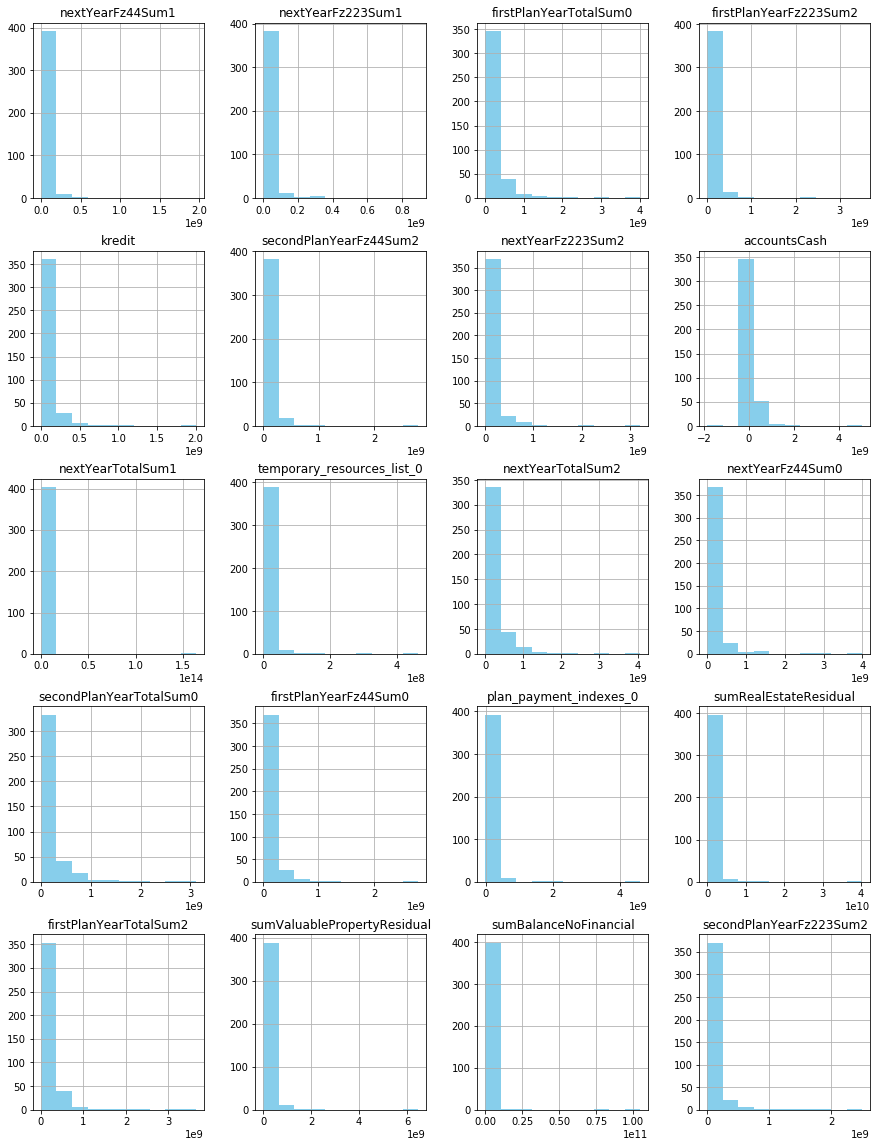

In [3]:
# general exploration
X.hist(figsize=(15,20), color='skyblue');

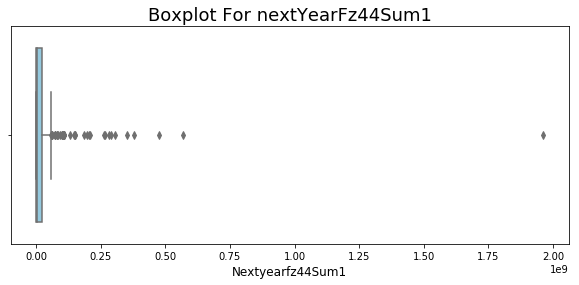

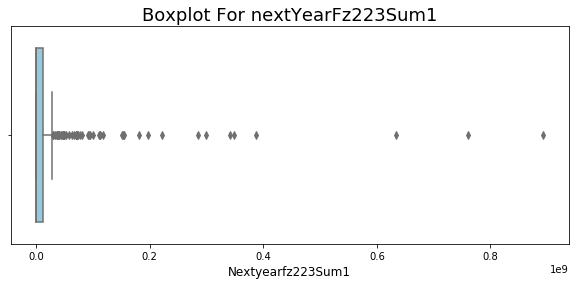

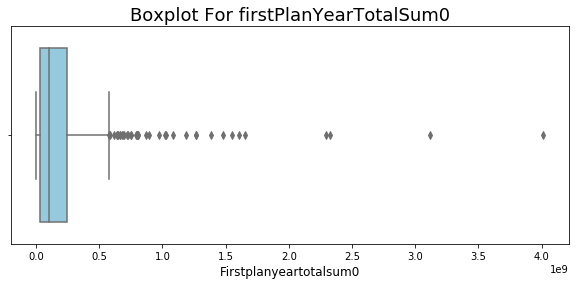

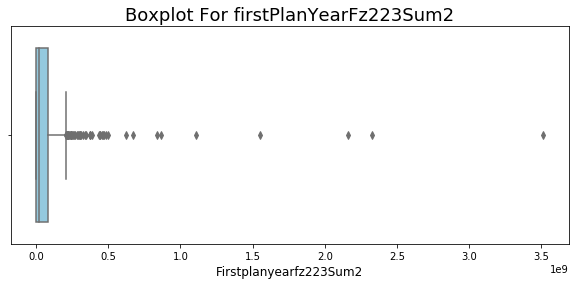

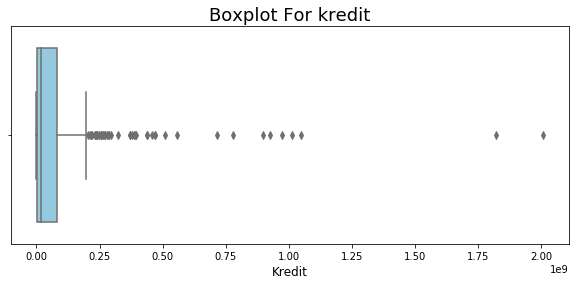

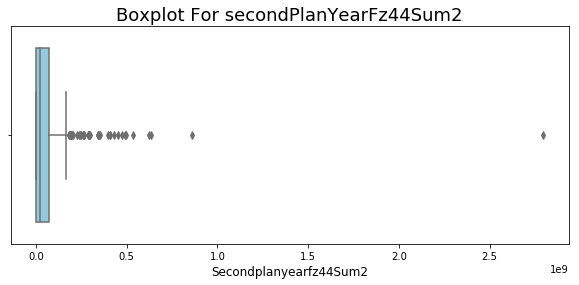

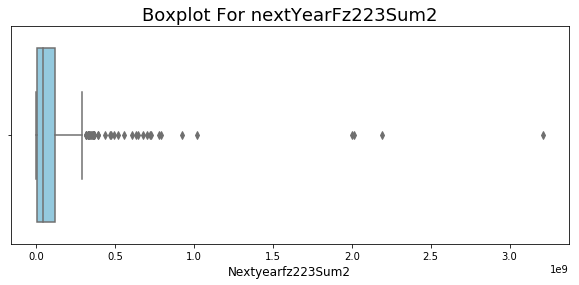

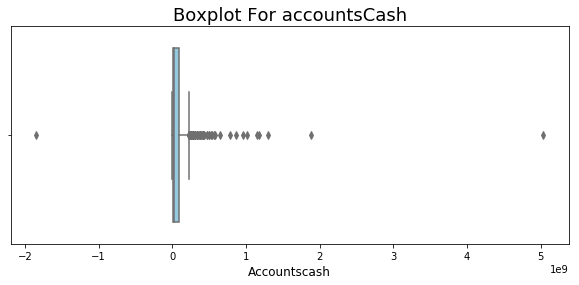

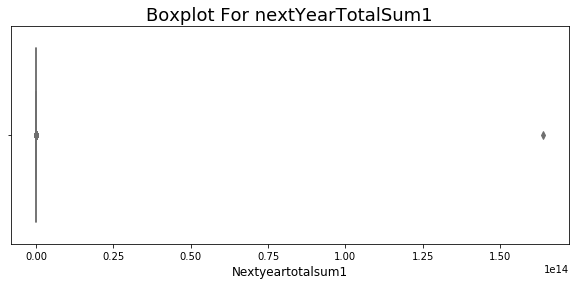

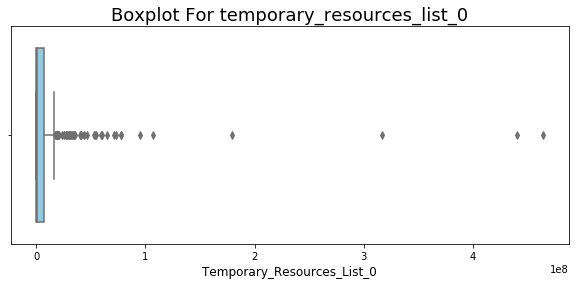

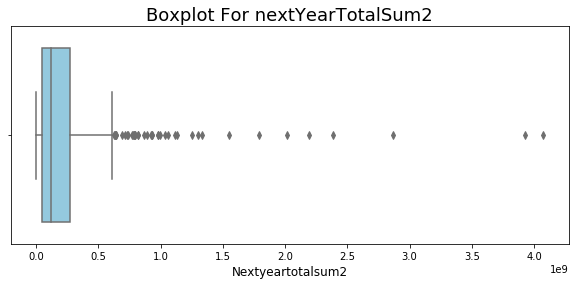

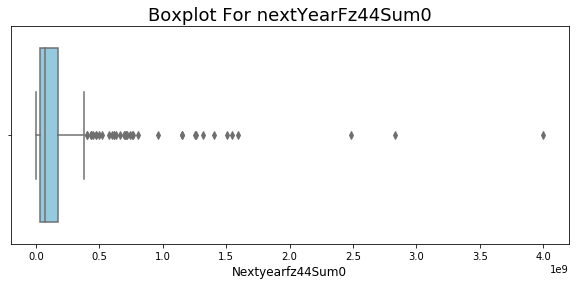

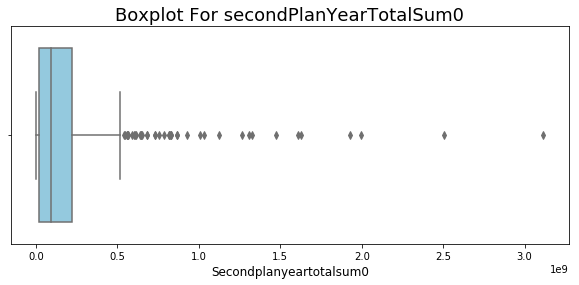

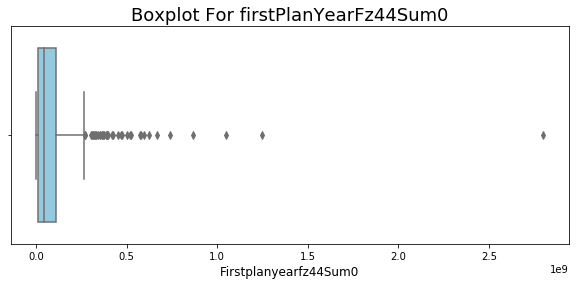

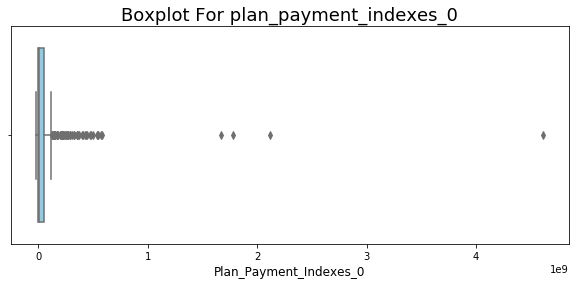

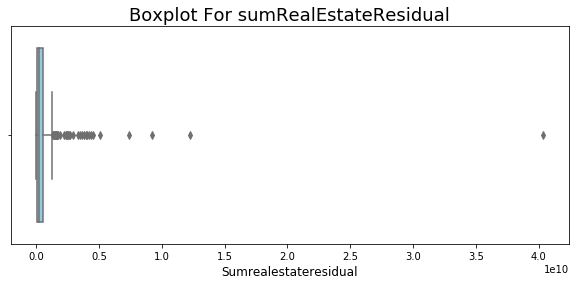

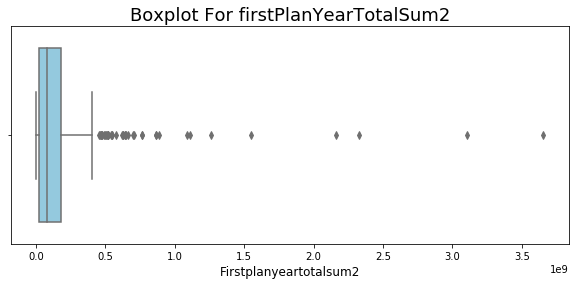

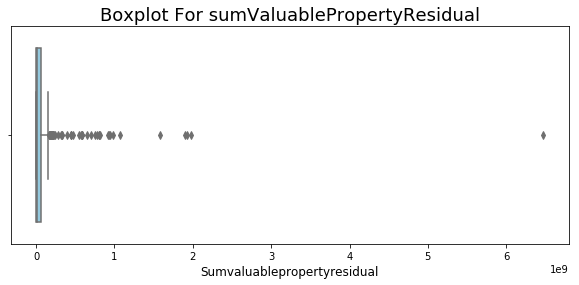

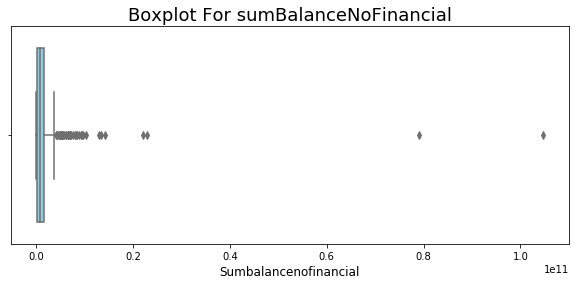

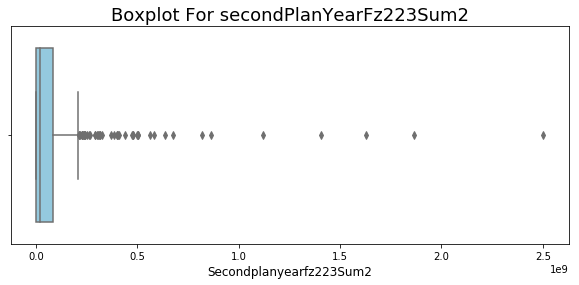

In [4]:
for col_name in X.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=X[col_name], color='skyblue')

    plt.title('Boxplot For ' + col_name, fontsize=18)
    plt.xlabel(col_name.title(), fontsize=12)
    plt.savefig('..\\reports\\figures\\boxplot_' + col_name + '.png', dpi=100)
    plt.show()

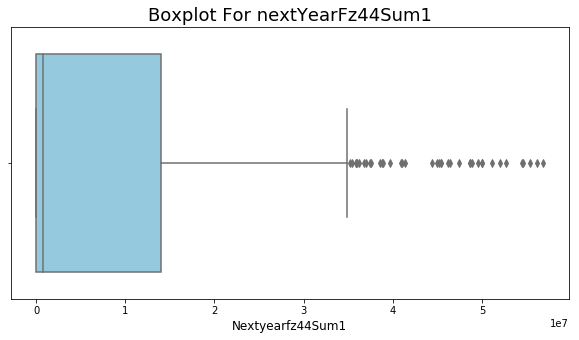

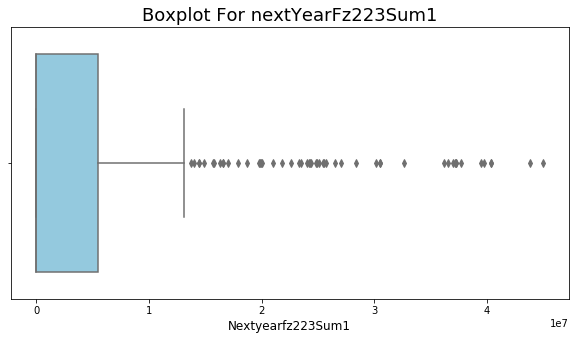

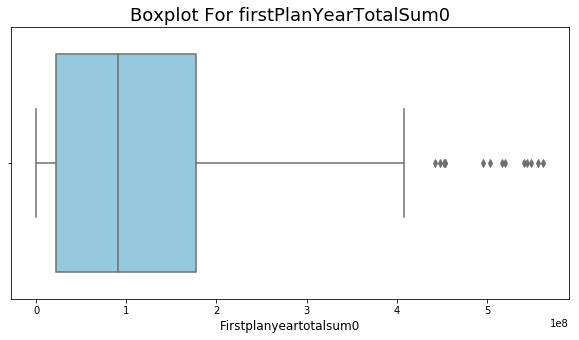

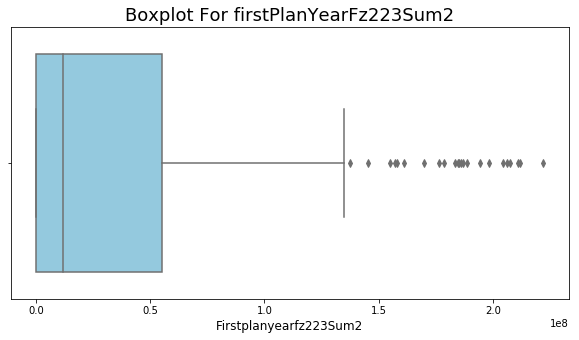

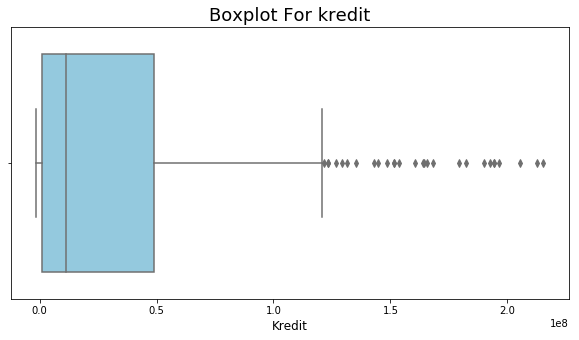

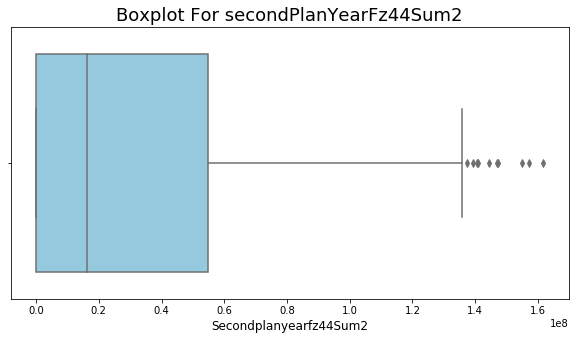

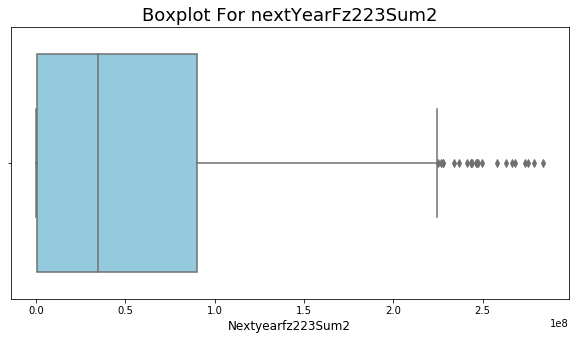

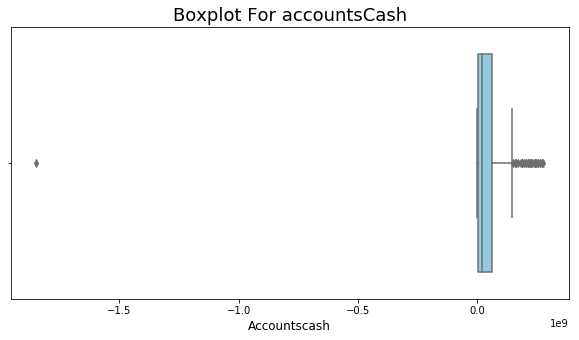

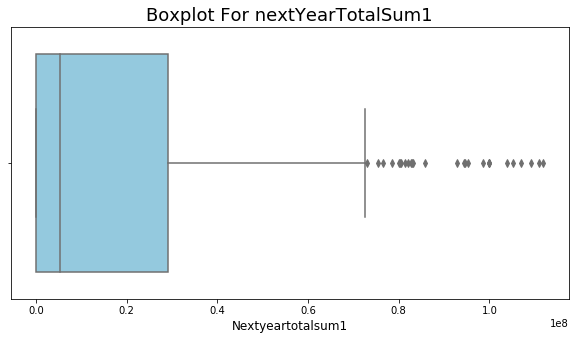

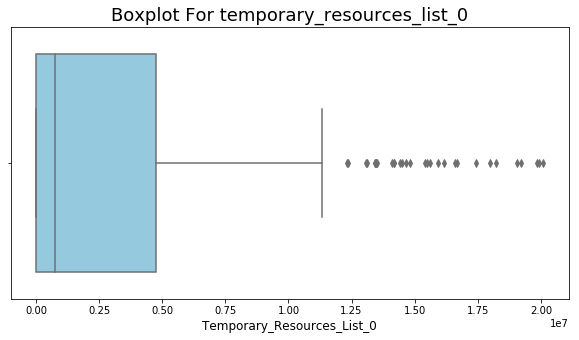

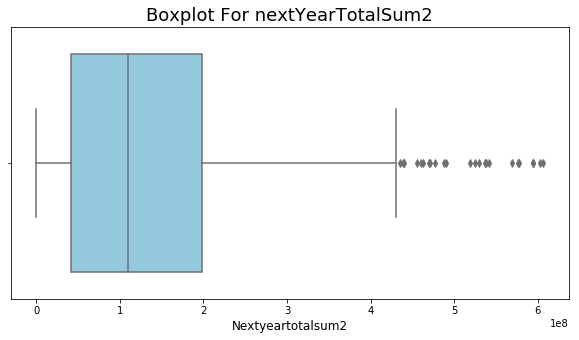

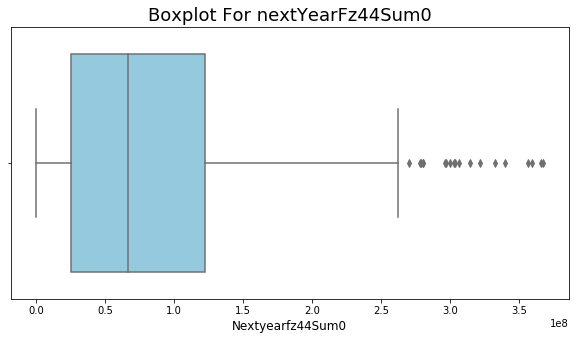

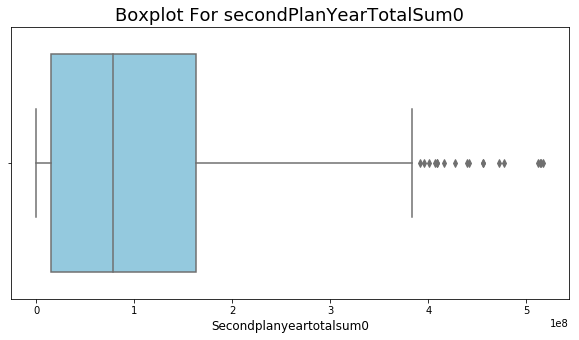

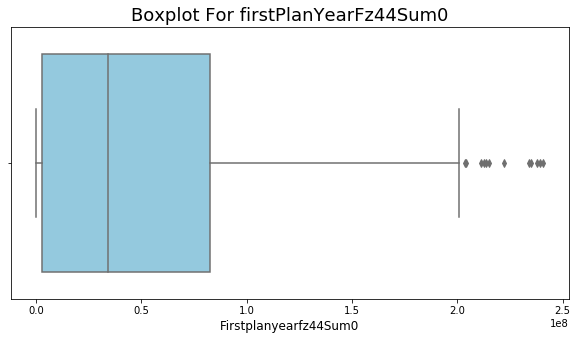

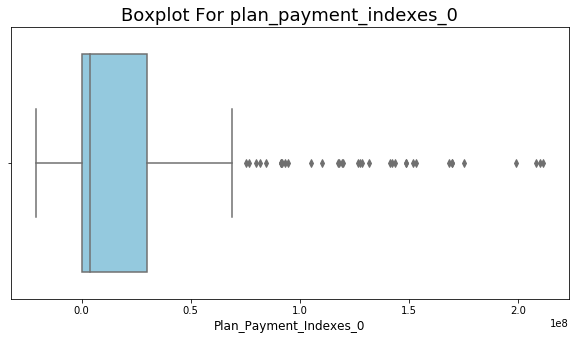

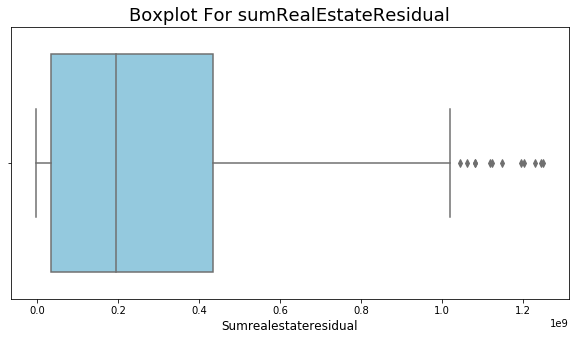

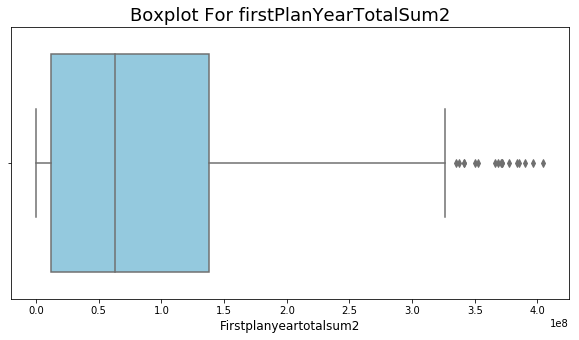

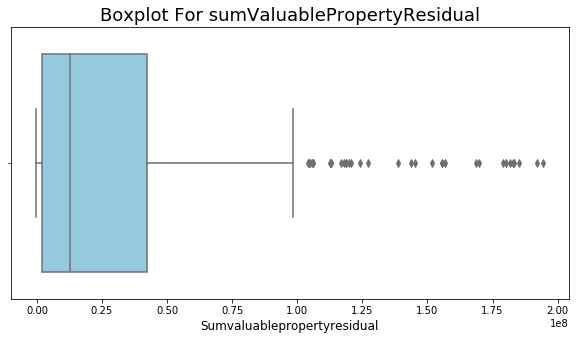

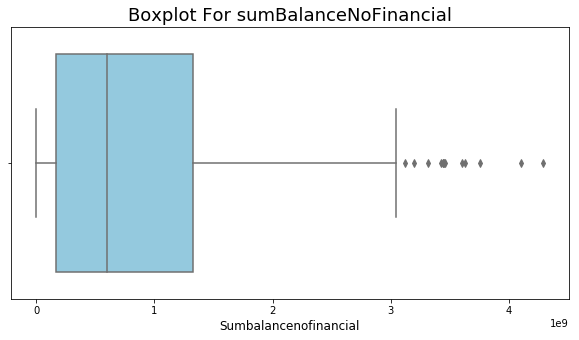

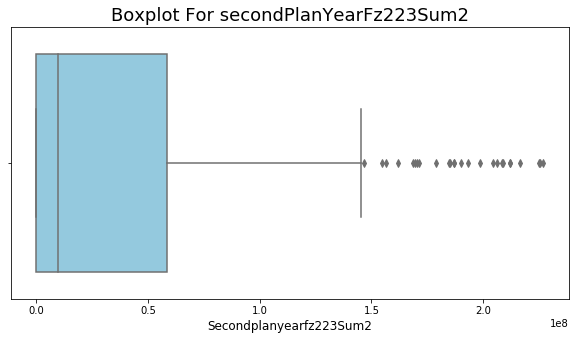

In [6]:
#taking up to the 90% quantile
for col_name in X.columns:
    plt.figure(figsize=(10,5))

    sns.boxplot(x=X[col_name][X[col_name] < X[col_name].quantile(0.90)], color='skyblue');
    plt.title('Boxplot For ' + col_name, fontsize=18);
    plt.xlabel(col_name.title(), fontsize=12);

In [10]:
clf = IsolationForest(max_samples=100, random_state = 1, contamination= 0.4)
preds = clf.fit_predict(X)
X['outliers_ind'] = preds
outliers_ind = []
outliers_inn = []
for ind in X.index:
    if X['outliers_ind'][ind]==-1:
        outliers_ind.append(ind)
        outliers_inn.append(INN[ind])
print(outliers_ind)
print(outliers_inn)
#outliers = pd.DataFrame()
#outliers['preds'] = preds
#outliers['inn_2018'] = inn_2018
#outliers.info()

[13, 15, 28, 35, 36, 50, 60, 62, 83, 84, 85, 87, 89, 103, 104, 105, 108, 125, 130, 132, 151, 156, 173, 178, 181, 190, 193, 205, 216, 232, 235, 239, 240, 241, 242, 252, 259, 264, 265, 266, 293, 295, 296, 297, 298, 299, 301, 305, 307, 311, 314, 315, 323, 324, 325, 326, 330, 334, 339, 345, 348, 349, 350, 352, 355, 356, 368, 381, 382, 383, 394, 397, 399, 400, 401, 411, 418, 422, 426, 431, 432, 434, 441, 444, 446, 448, 449, 459, 461, 465, 468, 470, 471, 475, 476, 484, 485, 486, 487, 488, 494, 495, 496, 497, 499, 500, 502, 504, 506, 511, 525, 529, 534, 535, 539, 540, 542, 545, 548, 550, 556, 558, 561, 563, 565, 566, 579, 580, 583, 586, 587, 594, 607, 611, 614, 619, 621, 623, 628, 644, 646, 658, 666, 667, 668, 672, 679, 696, 713, 720, 726, 728, 736, 738, 739, 744, 751, 755, 756, 767, 774, 785]
['7702066990', '1215026836', '2452042345', '7717035419', '5260001439', '1656019286', '7701012399', '3123035312', '2225003156', '3446500743', '0274035573', '7414002238', '3662020886', '2721020896', '7813

In [11]:
print('Число вузов, попавших в выбросы =', len(outliers_inn))

Число вузов, попавших в выбросы = 162


In [14]:
i = 1
for inn_num in outliers_inn:
    print(i, '-', vuz_inn[vuz_inn['inn']==inn_num]['full_name'].values[0])
    i+=1

1 - федеральное государственное бюджетное образовательное учреждение высшего образования «Московский архитектурный институт (государственная академия)»
2 - федеральное государственное бюджетное образовательное учреждение высшего образования «Марийский государственный университет»
3 - федеральное государственное бюджетное образовательное учреждение высшего образования «Сибирская пожарно-спасательная академия» Государственной противопожарной службы Министерства Российской Федерации по делам гражданской обороны, чрезвычайным ситуациям и ликвидации последствий стихийных бедствий»
4 - федеральное государственное бюджетное образовательное учреждение высшего образования «Академия Государственной противопожарной службы Министерства Российской Федерации по делам гражданской обороны, чрезвычайным ситуациям и ликвидации последствий стихийных бедствий»
5 - федеральное государственное бюджетное образовательное учреждение высшего образования «Нижегородский государственный технический университет им.

In [15]:
IS_OUT = X['outliers_ind']
X.drop(['outliers_ind'], inplace=True, axis=1)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 786
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nextYearFz44Sum1             405 non-null    float64
 1   nextYearFz223Sum1            405 non-null    float64
 2   firstPlanYearTotalSum0       405 non-null    float64
 3   firstPlanYearFz223Sum2       405 non-null    float64
 4   kredit                       405 non-null    float64
 5   secondPlanYearFz44Sum2       405 non-null    float64
 6   nextYearFz223Sum2            405 non-null    float64
 7   accountsCash                 405 non-null    float64
 8   nextYearTotalSum1            405 non-null    float64
 9   temporary_resources_list_0   405 non-null    float64
 10  nextYearTotalSum2            405 non-null    float64
 11  nextYearFz44Sum0             405 non-null    float64
 12  secondPlanYearTotalSum0      405 non-null    float64
 13  firstPlanYearFz44Sum

In [17]:
with open('..\\data\\interim\\X_droped_outliers.pickle', 'wb') as f:
    pickle.dump(X, f)